In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style()

In [ ]:
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df = df[df['species'] != 'setosa']
df

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df = sns.load_dataset('iris')
df = df[df['species'] != 'setosa']
col = ['petal_length', 'petal_width']
X = df.loc[:, col]
species_to_num = {'versicolor': 0,
                  'virginica': 1}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

In [ ]:
X

,petal_length,petal_width
50,4.7,1.4
51,4.5,1.5
52,4.9,1.5
53,4.0,1.3
54,4.6,1.5
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [ ]:
y

50     0
51     0
52     0
53     0
54     0
      ..
145    1
146    1
147    1
148    1
149    1
Name: tmp, Length: 100, dtype: int64

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

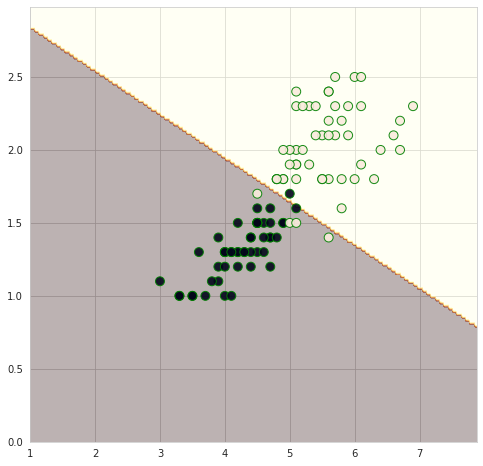

In [ ]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,8))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='g');

#1) PCA
#2) Linear Discriminant Analysis

explained variance ratio (first two components): [0.92461872 0.05306648]


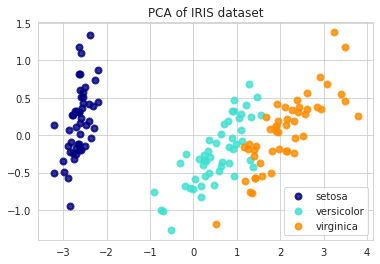

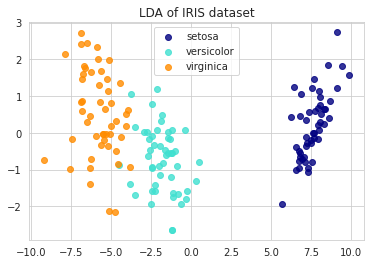

In [ ]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

# SVM

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [ ]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
col = ['petal_length', 'petal_width', 'species']
df.loc[:, col].head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


In [ ]:
df.species.unique()


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
col = ['petal_length', 'petal_width']
X = df.loc[:, col]

In [ ]:
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

In [ ]:
C = 0.001
clf = svm.SVC(kernel='linear', C=C)
#clf = svm.LinearSVC(C=C, loss='hinge')
#clf = svm.SVC(kernel='poly', degree=3, C=C)
#clf = svm.SVC(kernel='rbf', gamma=0.7, C=C)
clf.fit(X, y)

SVC(C=0.001, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
clf.predict([[6, 2]])


array([2])

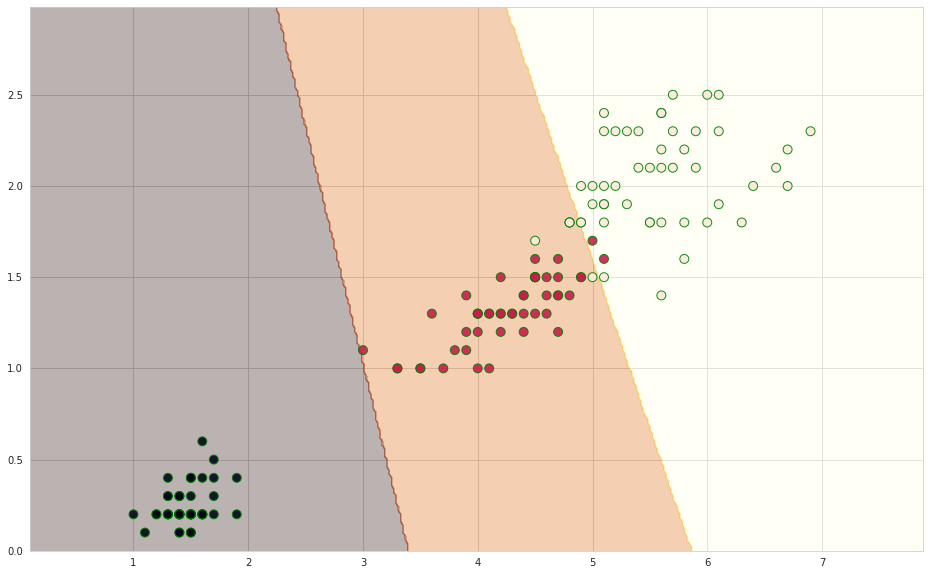

In [ ]:
Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(16,10))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='g');

#**Split Standar Scaler SVM**

In [ ]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

col = ['petal_length', 'petal_width']
X = df.loc[:, col]

species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8, 
                                                    random_state=0)

In [ ]:
sc_x = StandardScaler() #Stander Scaler for train data
X_std_train = sc_x.fit_transform(X_train)
X_std_test = sc_x.fit_transform(X_test)

In [ ]:
C = 1.0  #0.01
clf = svm.SVC(kernel='linear', C=C)
#clf = svm.LinearSVC(C=C, loss='hinge')
#clf = svm.SVC(kernel='poly', degree=3, C=C)
#clf = svm.SVC(kernel='rbf', gamma=0.7, C=C)



clf.fit(X_std_train, y_train)




SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_train_pred = clf.predict(X_std_train)
y_test_pred = clf.predict(X_std_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

MSE train: 0.0500, test: 0.2333
R^2 train: 0.9275, test: 0.5670


In [ ]:
confusion_matrix(y_test, y_test_pred)


array([[11,  0,  0],
       [ 0,  6,  7],
       [ 0,  0,  6]])

In [ ]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
                                                           y_test_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
                                                       y_test_pred, 
                                                       average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
                                               y_test_pred, 
                                               average='weighted')))

Precision Score: 	 0.8923
Recall Score: 		 0.7667
F1 Score: 		 0.7667


# **CrossValidition Standar Scaler SVM**

In [ ]:
df = sns.load_dataset('iris')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

col = ['petal_length', 'petal_width']
X = df.loc[:, col]

species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
sc_x = StandardScaler() #Stander Scaler for train data
X_std_train = sc_x.fit_transform(X)

In [ ]:
res = cross_val_score(clf, X_std_train, y, cv=10, scoring='accuracy')    #Crooss Validition 
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

Average Accuracy: 	 0.9600
Accuracy SD: 		 0.0442


In [ ]:
y_pred = cross_val_predict(clf, X_std_train, y, cv=3)

In [ ]:
confusion_matrix(y, y_pred)


array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  4, 46]])

In [ ]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
                                                           y_test_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
                                                       y_test_pred, 
                                                       average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
                                               y_test_pred, 
                                               average='weighted')))

Precision Score: 	 0.8923
Recall Score: 		 0.7667
F1 Score: 		 0.7667


# **Pipeline Split**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV


In [ ]:
pipeline = Pipeline([('clf', svm.SVC(kernel='rbf', C=1, gamma=0.1))])

In [ ]:
params = {'clf__C':(0.1, 0.5, 1, 2, 5, 10, 20), 
          'clf__gamma':(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)}

In [ ]:
svm_grid_rbf = GridSearchCV(pipeline, params, n_jobs=-1,
                            cv=3, verbose=1, scoring='accuracy')

In [ ]:
svm_grid_rbf.fit(X_train, y_train)

Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:    1.8s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('clf',
                                        SVC(C=1, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma=0.1, kernel='rbf',
                                            max_iter=-1, probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                                verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'clf__C': (0.1, 0.5, 1, 2, 5, 10, 20),
                         'clf__gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)},
             pre_dispatch='2*n_jobs', refit=True, retur

In [ ]:
svm_grid_rbf.best_score_

0.9583333333333334

In [ ]:
best = svm_grid_rbf.best_estimator_.get_params()

In [ ]:
for k in sorted(params.keys()): 
    print('\t{0}: \t {1:.2f}'.format(k, best[k]))

	clf__C: 	 0.50
	clf__gamma: 	 0.50


In [ ]:
y_test_pred = svm_grid_rbf.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [ ]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
                                                           y_test_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
                                                       y_test_pred, 
                                                       average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
                                               y_test_pred, 
                                               average='weighted')))

Precision Score: 	 1.0000
Recall Score: 		 1.0000
F1 Score: 		 1.0000


### **Diffrent between 3 types of SVM Split data**

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [104]:
boston_data = load_boston()
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [105]:
y = boston_data.target
X = df[['LSTAT']].values

In [106]:
svr = SVR()

svr.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [107]:
sort_idx = X.flatten().argsort()


In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], svr.predict(X[sort_idx]), color='r') 

plt.xlabel('LSTAT')
plt.ylabel('MEDV');

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [114]:
svr = SVR(kernel='linear') #111111111111111111111111111111111111111111111111111111111111111111111111111
svr.fit(X_train, y_train)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [115]:
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))

MSE train: 41.8187, test: 36.8372


In [116]:
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

R^2 train: 0.5242, test: 0.5056


In [117]:
svr = SVR(kernel='poly', C=1e3, degree=2) #222222222222222222222222222222222222222222222222222222222222222222
svr.fit(X_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [118]:
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

MSE train: 58.7201, test: 48.1976
R^2 train: 0.3319, test: 0.3532


In [119]:
svr = SVR(kernel='rbf', C=1e3, gamma=0.1) #3333333333333333333333333333333333333333333333333333333333333333333
svr.fit(X_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [120]:
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred), 
             mean_squared_error(y_test, y_test_pred)))
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

MSE train: 27.5635, test: 26.7051
R^2 train: 0.6864, test: 0.6416


# **XGboost**

In [121]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [122]:
df = sns.load_dataset('titanic')


In [123]:
df.dropna(inplace=True)


In [124]:
X = df[['pclass', 'sex', 'age']]


In [125]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

In [126]:
X['sex'] = lb.fit_transform(X['sex'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [127]:
y = df['survived']


In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [129]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [130]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))

In [131]:
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3,
                            n_jobs=-1)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=10000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [132]:
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True) ###########


Train Result:

accuracy score: 0.9370

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        41
           1       0.95      0.95      0.95        86

    accuracy                           0.94       127
   macro avg       0.93      0.93      0.93       127
weighted avg       0.94      0.94      0.94       127


Confusion Matrix: 
 [[37  4]
 [ 4 82]]

Average Accuracy: 	 0.7500
Accuracy SD: 		 0.0787


In [133]:
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)


Test Result:

accuracy score: 0.8182

Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.61      0.69        18
           1       0.83      0.92      0.87        37

    accuracy                           0.82        55
   macro avg       0.81      0.77      0.78        55
weighted avg       0.82      0.82      0.81        55


Confusion Matrix: 
 [[11  7]
 [ 3 34]]



## SVM Split & Crossvalidition

In [134]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

boston = datasets.load_boston()
boston.data.shape, boston.target.shape


((506, 13), (506,))

In [136]:
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, test_size=0.4, random_state=0)   #Split

X_train.shape, y_train.shape
X_test.shape, y_test.shape

clf=svm.SVR(kernel='linear', C=1)
regression = clf.fit(X_train, y_train)
regression.score(X_test, y_test)

0.667431382173115

In [137]:
from sklearn.model_selection import cross_val_score
regression = svm.SVR(kernel='linear', C=1)
scores = cross_val_score(regression, boston.data, boston.target, cv=5) #CrossValid
scores

array([0.77285459, 0.72771739, 0.56131914, 0.15056451, 0.08212844])

In [138]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))  #Accuracy and Standerdivition


Accuracy: 0.46 (+/- 0.58)


In [139]:
from sklearn import metrics
scores = cross_val_score(
    regression, boston.data, boston.target, cv=5, scoring='neg_mean_squared_error')
scores

array([ -7.84451123, -24.78772444, -35.13272326, -74.50555945,
       -24.40465975])

# pipeline split & CrossValid

In [140]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.pipeline import make_pipeline


#Split
pipe_svm = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        svm.SVR(kernel='linear', C=1))

pipe_svm.fit(X_train, y_train)
y_pred = pipe_svm.predict(X_test)
print('Test Accuracy: %.3f' % pipe_svm.score(X_test, y_test))

Test Accuracy: 0.391


In [144]:
#CrossValid
X=boston.data
y=boston.target
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=pipe_svm,
                         X=X,
                         y=y,
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)

print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

CV accuracy scores: [ 0.30594616  0.20424768 -0.91535059 -0.41997792  0.1367854  -0.44765875
 -0.2817926   0.07408141 -0.12290912 -0.39409675]
CV accuracy: -0.186 +/- 0.357


## **RandomForestClassifier**

In [145]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [146]:
df = sns.load_dataset('titanic')
df.shape

(891, 15)

In [147]:
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [148]:
df.dropna(inplace=True)
df['pclass'].unique()

array([1, 3, 2])

In [149]:
df['pclass'].value_counts()


1    157
2     15
3     10
Name: pclass, dtype: int64

In [150]:
df['sex'].unique()


array(['female', 'male'], dtype=object)

In [151]:
df['sex'].value_counts()


male      94
female    88
Name: sex, dtype: int64

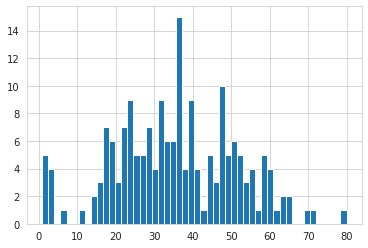

In [152]:
df['age'].hist(bins=50);


In [153]:
X = df[['pclass', 'sex', 'age']]


In [154]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
X['sex'] = lb.fit_transform(X['sex'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [155]:
X.head()


,pclass,sex,age
1,1,0,38.0
3,1,0,35.0
6,1,1,54.0
10,3,0,4.0
11,1,0,58.0


In [156]:
X.shape


(182, 3)

In [157]:
X.describe()


,pclass,sex,age
count,182.000000,182.000000,182.000000
mean,1.192308,0.516484,35.623187
std,0.516411,0.501107,15.671615
min,1.000000,0.000000,0.920000
25%,1.000000,0.000000,24.000000
50%,1.000000,1.000000,36.000000
75%,1.000000,1.000000,47.750000
max,3.000000,1.000000,80.000000


In [158]:
X.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 1 to 889
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  182 non-null    int64  
 1   sex     182 non-null    int64  
 2   age     182 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 5.7 KB


In [159]:
y = df['survived']
y.value_counts()

1    123
0     59
Name: survived, dtype: int64

In [ ]:
################################################################################################################

In [160]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)


In [162]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))

In [163]:
rf_clf = RandomForestClassifier(random_state=42)


In [164]:
rf_clf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [165]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)


Train Result:

accuracy score: 0.9632

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        51
           1       0.97      0.97      0.97       112

    accuracy                           0.96       163
   macro avg       0.96      0.96      0.96       163
weighted avg       0.96      0.96      0.96       163


Confusion Matrix: 
 [[ 48   3]
 [  3 109]]

Average Accuracy: 	 0.8276
Accuracy SD: 		 0.1036


In [166]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)


Test Result:

accuracy score: 0.5263

Classification Report: 
               precision    recall  f1-score   support

           0       0.40      0.25      0.31         8
           1       0.57      0.73      0.64        11

    accuracy                           0.53        19
   macro avg       0.49      0.49      0.47        19
weighted avg       0.50      0.53      0.50        19


Confusion Matrix: 
 [[2 6]
 [3 8]]



In [167]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [168]:
rf_clf = RandomForestClassifier(random_state=42)


In [169]:
params_grid = {"max_depth": [3, None],
               "min_samples_split": [2, 3, 10],
               "min_samples_leaf": [1, 3, 10],
               "bootstrap": [True, False],
               "criterion": ['gini', 'entropy']}

In [170]:
grid_search = GridSearchCV(rf_clf, params_grid,
                           n_jobs=-1, cv=5,
                           verbose=1, scoring='accuracy')

In [171]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   41.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [172]:
grid_search.best_score_


0.834659090909091

In [173]:
grid_search.best_estimator_.get_params()


{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [174]:
print_score(grid_search, X_train, y_train, X_test, y_test, train=True)


Train Result:

accuracy score: 0.9632

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94        51
           1       0.99      0.96      0.97       112

    accuracy                           0.96       163
   macro avg       0.95      0.97      0.96       163
weighted avg       0.97      0.96      0.96       163


Confusion Matrix: 
 [[ 50   1]
 [  5 107]]

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   39.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   39.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   39.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   39.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   39.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   24.2s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   40.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   39.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   39.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   40.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   24.0s


Average Accuracy: 	 0.8213
Accuracy SD: 		 0.1156


[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   39.7s finished


In [175]:
print_score(grid_search, X_train, y_train, X_test, y_test, train=False)


Test Result:

accuracy score: 0.5789

Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.38      0.43         8
           1       0.62      0.73      0.67        11

    accuracy                           0.58        19
   macro avg       0.56      0.55      0.55        19
weighted avg       0.57      0.58      0.57        19


Confusion Matrix: 
 [[3 5]
 [3 8]]



# KNeighborsClassifier

In [176]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')

In [177]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [178]:
X_train = df[['petal_length', 'petal_width']]
species_to_num = {'setosa': 0,
                  'versicolor': 1,
                  'virginica': 2}
df['species'] = df['species'].map(species_to_num)
y_train = df['species']

In [179]:
from sklearn.neighbors import KNeighborsClassifier


In [180]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

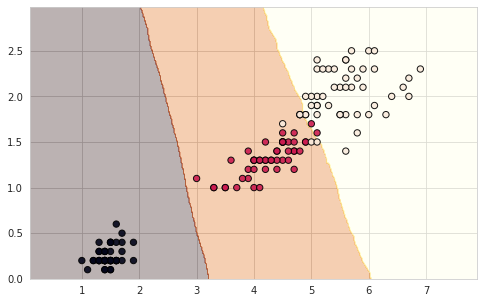

In [181]:
Xv = X_train.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y_train.min(), y_train.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

fig = plt.figure(figsize=(8,5))

ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3, 
                  );
plt.scatter(X_train.values[:, 0], X_train.values[:, 1], c=y_train, s=40, 
            alpha=0.9, edgecolors='k');

## **LogisticRegression**

In [182]:
from sklearn.datasets import load_iris
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

*LogisticRegression*

In [183]:
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression(solver='liblinear')

# fit the model with data
logreg.fit(X, y)

# predict the response values for the observations in X
logreg.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [185]:
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

0.96


*KNeighborsClassifier*

In [186]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9666666666666667


In [187]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

1.0


In [188]:
# print the shapes of X and y
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [189]:
# STEP 1: split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [190]:

# print the shapes of the new X Train Feature objects
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


In [191]:
# print the shapes of the new y Tet Feature objects
print(y_train.shape)
print(y_test.shape)

(90,)
(60,)


In [192]:
# STEP 2: train the model on the training set
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [193]:
# STEP 3: make predictions on the testing set
y_pred = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print(metrics.accuracy_score(y_test, y_pred))

0.9333333333333333


In [194]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


In [195]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.95


# **KNeighborsClassifier & LogisticRegression SPLIT**

In [196]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [197]:
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

In [198]:
# use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9736842105263158


In [199]:
# simulate splitting a dataset of 25 observations into 5 folds
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False).split(range(25))

# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


In [202]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
CV accuracy: 0.967 +/- 0.045


# **KNeighborsClassifier & LogisticRegression CRossVlid**

In [204]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

[0.96, 0.9533333333333334, 0.9666666666666666, 0.9666666666666666, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9666666666666668, 0.9666666666666668, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9800000000000001, 0.9733333333333334, 0.9800000000000001, 0.9666666666666666, 0.9666666666666666, 0.9733333333333334, 0.96, 0.9666666666666666, 0.96, 0.9666666666666666, 0.9533333333333334, 0.9533333333333334, 0.9533333333333334]
CV accuracy: 0.953 +/- 0.043


In [207]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.9800000000000001


In [208]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.9533333333333334
